# **Golden Task**: Blindness Detection
**Dataset**: Aptos 2019 Blindness detection (kaggle)

In [ ]:
!kaggle competitions download -c aptos2019-blindness-detection


In [ ]:
! kaggle competitions download -c aptos2019-blindness-detection

In [ ]:
! unzip aptos2019-blindness-detection.zip

In [ ]:
import cv2;
import matplotlib.pyplot as plt
import numpy as np;
import pandas as pd
from random import shuffle;
import cv2;
from random import shuffle;
from tqdm import tqdm;
import tensorflow;
from keras import layers;
from keras import Model;
from keras.optimizers import SGD;
from keras.callbacks import TensorBoard;
IMAGE_SIZE = 300;


In [ ]:
! pip3 install keras

In [ ]:
from keras.optimizers import Adam, SGD, RMSprop

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
train_Data_X_File = drive.CreateFile({'id': '1IJRvy-hV3sgEzjJVMnAtieeaASnjClZ1'});
train_Data_Y_File = drive.CreateFile({'id': '1_flYvBAJCp-vP0lYWkAEH3NgkS6Oqa9W'});

In [ ]:
train_Data_X_File.GetContentFile('train_Data_X.npy');
train_Data_X = np.load('train_Data_X.npy', allow_pickle=True)

train_Data_Y_File.GetContentFile('train_Data_Y.npy');
train_Data_Y = np.load('train_Data_Y.npy', allow_pickle=True)

train_Data_X.shape

(3662, 1, 300, 300, 3)

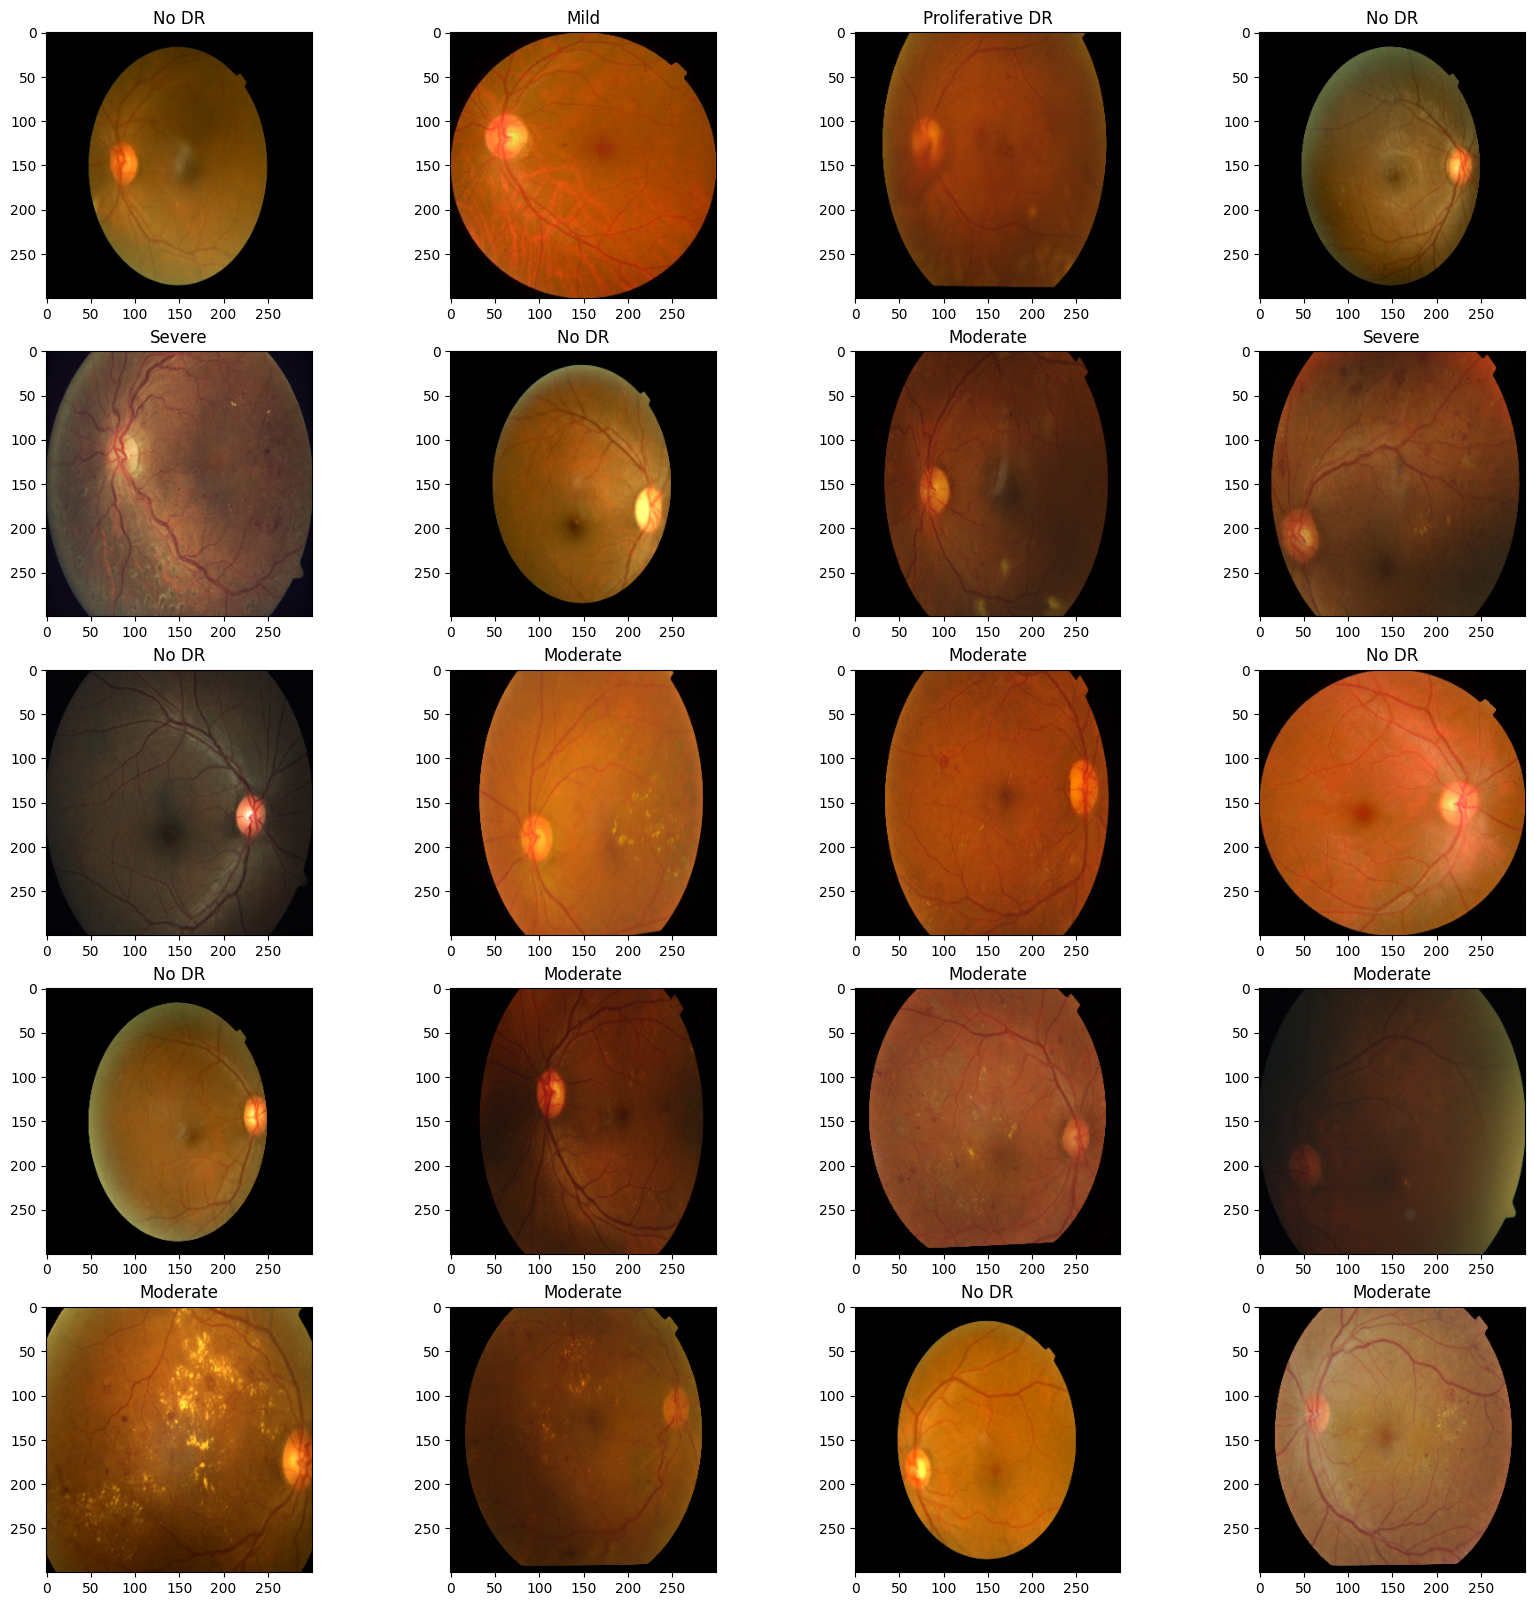

In [ ]:
count = 0;
Num_of_Images = 20;
plt.figure(figsize=(20,20))
label = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR'];
for i in np.random.randint(1000, size = Num_of_Images):
  count = count+1;
  plt.subplot(Num_of_Images//4,4, count);
  plt.imshow(np.reshape(train_Data_X[i],(IMAGE_SIZE,IMAGE_SIZE,3)));
  plt.title(label[int(train_Data_Y[i])]);

In [ ]:

num_of_Rows = train_Data_X.shape[0];
num_of_columns = train_Data_X.shape[1];
training_X = train_Data_X[:int(np.round(num_of_Rows*0.8))]
testing_X = train_Data_X[int(np.round(num_of_Rows*0.8)):]
training_Y = train_Data_Y[:int(np.round(num_of_Rows*0.8))]
testing_Y = train_Data_Y[int(np.round(num_of_Rows*0.8)):]


In [ ]:

img_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

In [ ]:

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

In [ ]:

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:

x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:

x = layers.Flatten()(x)

In [ ]:

x = layers.Dense(512, activation='relu')(x)

In [ ]:

output = layers.Dense(5, activation='softmax')(x)

In [ ]:

model = Model(img_input, output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496 

In [ ]:

model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.00005),metrics=['acc']);

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:

X_train = np.array([i[0] for i in tqdm(training_X)]);
Y_train = np.array([i[0] for i in training_Y]);

X_test = np.array([i[0] for i in tqdm(testing_X)]);
Y_test = np.array([i[0] for i in testing_Y]);

X_train.shape

100%|██████████| 732/732 [00:00<00:00, 286055.21it/s]


(2930, 300, 300, 3)

In [ ]:

Model_fit = model.fit(X_train,Y_train, batch_size =64, epochs = 10,verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
46/46 [==============================] - 377s 8s/step - loss: 11.1296 - acc: 0.5423 - val_loss: 1.5982 - val_acc: 0.6981
Epoch 2/10
46/46 [==============================] - 381s 8s/step - loss: 1.0991 - acc: 0.6754 - val_loss: 0.9036 - val_acc: 0.6954
Epoch 3/10
46/46 [==============================] - 376s 8s/step - loss: 0.8605 - acc: 0.7222 - val_loss: 0.9816 - val_acc: 0.6557
Epoch 4/10
46/46 [==============================] - 381s 8s/step - loss: 0.8006 - acc: 0.7283 - val_loss: 0.9505 - val_acc: 0.7199
Epoch 5/10
46/46 [==============================] - 393s 9s/step - loss: 0.7228 - acc: 0.7495 - val_loss: 0.8867 - val_acc: 0.7199
Epoch 6/10
46/46 [==============================] - 358s 8s/step - loss: 0.5969 - acc: 0.7884 - val_loss: 0.8624 - val_acc: 0.7145
Epoch 7/10
46/46 [==============================] - 381s 8s/step - loss: 0.5661 - acc: 0.8058 - val_loss: 0.8560 - val_acc: 0.7281
Epoch 8/10
46/46 [==============================] - 377s 8s/step - loss: 0.4615 - 

In [ ]:

Marks=model.evaluate(X_test,Y_test,verbose=0)
print('Test Accuracy percentage:',100*Marks[1],"%")
print('Test Loss percentage:',100*Marks[0],"%")

Test Accuracy percentage: 71.31147384643555 %
Test Loss percentage: 84.79785323143005 %


In [ ]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 101ms/step


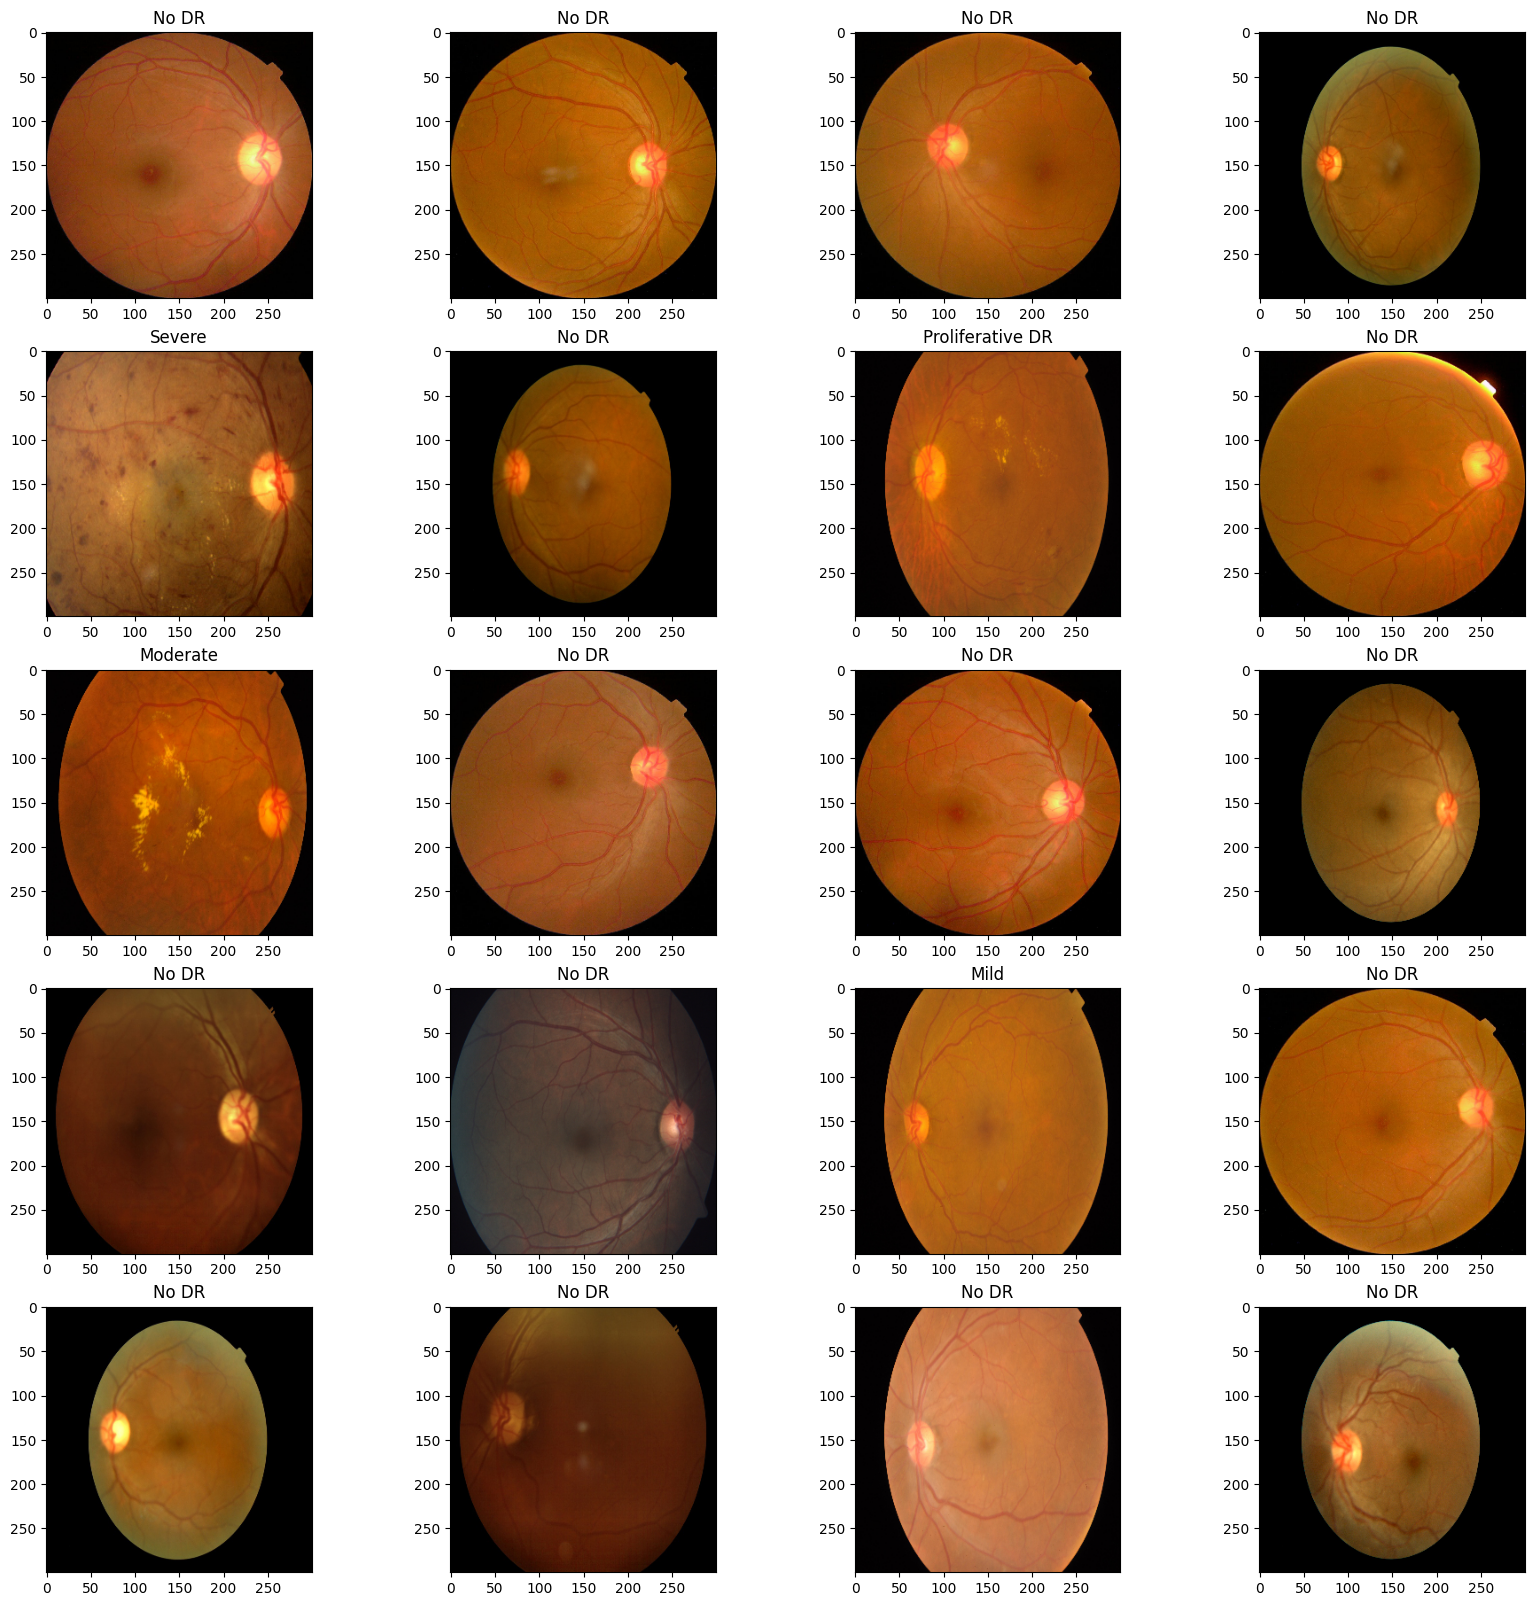

In [ ]:
count=0;
Num_of_Images=20;
plt.figure(figsize=(20,20))
label=['No DR','Mild','Moderate','Severe','Proliferative DR'];
for i in np.random.randint(500,size=Num_of_Images):
  count=count+1;
  plt.subplot(Num_of_Images//4,4, count);
  plt.imshow(np.reshape(X_test[i],(IMAGE_SIZE,IMAGE_SIZE,3)));
  P = model.predict(X_test[i].reshape(1,IMAGE_SIZE,IMAGE_SIZE,3)) # Prediction of testing images
  P=np.array(P);
  plt.title(label[int(Y_test[i])]);

In [ ]:
acc=Model_fit.history['acc']
val_acc=Model_fit.history['val_acc']
loss=Model_fit.history['loss']
val_loss=Model_fit.history['val_loss']
epochs=range(1,len(acc)+1)

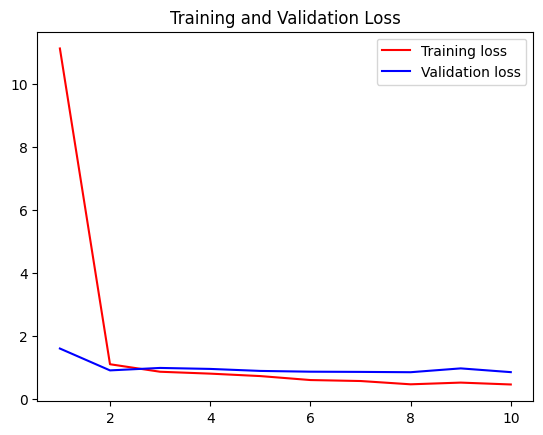

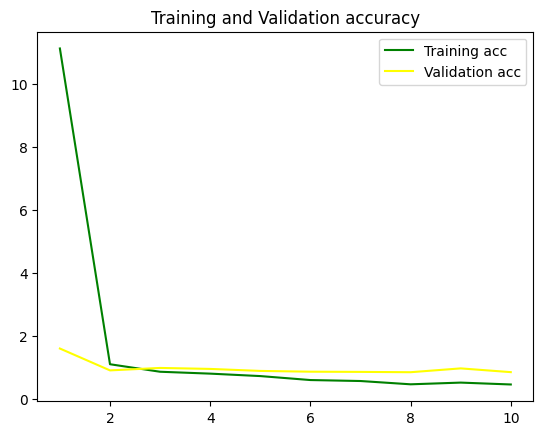

In [ ]:

plt.figure()
plt.title('Training and Validation Loss')
plt.plot(epochs,loss,'red',label='Training loss')
plt.plot(epochs,val_loss,'blue',label='Validation loss')
plt.legend()


plt.figure()
plt.title('Training and Validation accuracy')
plt.plot(epochs,loss,'green',label='Training acc')
plt.plot(epochs,val_loss,'yellow',label='Validation acc')

plt.legend()
plt.show()

